In [44]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import colorsys
from sklearn.cluster import KMeans

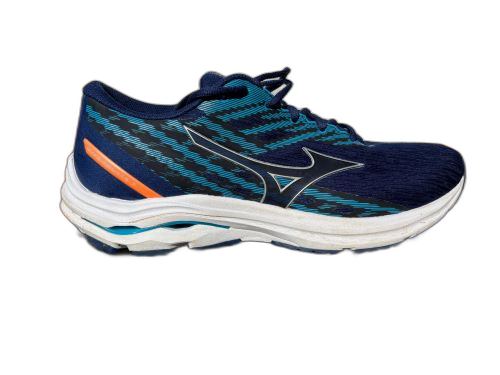

In [45]:
input_path = 'D:\Fyp\DigitalMarketingToolUsingGenAI\\temp\product-nonbg.png'
original = Image.open(input_path)
original

# Convert to RGB colors and Find the dominant colors

     r    g    b      hex  hsl
0   18   24   48  #121830  227
1  232  231  230  #e8e7e6   30


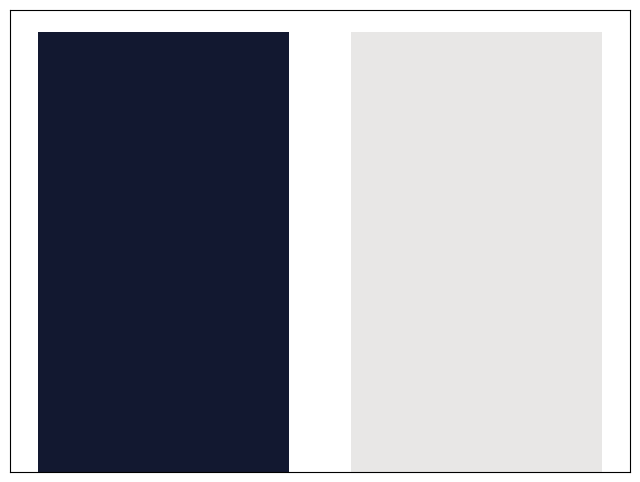

['#121830', '#e8e7e6']


In [2]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import colorsys
from sklearn.cluster import KMeans


def get_palette(image_path):
    original = Image.open(image_path)
    reduced_image = original.convert("P", palette=Image.Palette.WEB)
    palette = reduced_image.getpalette()
    palette = [palette[i:i+3] for i in range(0, len(palette), 3)]
    return reduced_image, palette

def count_color_frequencies(reduced_image, palette):
    color_count = [(count, palette[color_index]) for count, color_index in reduced_image.getcolors()]
    return pd.DataFrame(color_count, columns=['cnt', 'RGB'])

def rgb_to_hex(red, green, blue):
    return f'#{red:02x}{green:02x}{blue:02x}'

def rgb_to_hsl_hue(r, g, b):
    h, _, _ = colorsys.rgb_to_hls(r / 255, g / 255, b / 255)
    return str(int(round(h * 359)))  # Hue value in range [0, 359]

def cluster_and_get_top_colors(df):
    kmeans_hsl = KMeans(n_clusters=2, random_state=42)
    df['cluster_hsl'] = kmeans_hsl.fit_predict(df[['hsl']])

    top_colors_hsl = df.groupby('cluster_hsl').head(1).reset_index(drop=True)
    return top_colors_hsl

def main(image_path):
    reduced_image, palette = get_palette(image_path)
    
    color_count_df = count_color_frequencies(reduced_image, palette)
    
    color_count_df = color_count_df.sort_values(by='cnt', ascending=False).iloc[:6]
    
    RGB = pd.DataFrame(color_count_df['RGB'].to_list(), columns=['r', 'g', 'b'])
    RGB['hex'] = RGB.apply(lambda r: rgb_to_hex(*r), axis=1)
    RGB = RGB[RGB['hex'] != '#000000']
    
    RGB['hsl'] = RGB.apply(lambda r: rgb_to_hsl_hue(r['r'], r['g'], r['b']), axis=1)
    top_colors = cluster_and_get_top_colors(RGB)

    top_colors.drop(['cluster_hsl'], axis=1, inplace=True)

    # Complementary color logic
    if len(top_colors) == 1:
        # Extract the dominant color
        dominant_color = top_colors.iloc[0]
        r, g, b = dominant_color['r'], dominant_color['g'], dominant_color['b']
        # Calculate complementary color
        comp_r, comp_g, comp_b = np.round(255 - r), np.round(255 - g), np.round(255 - b)
        complementary_row = {'r': comp_r, 'g': comp_g, 'b': comp_b, 'hex': rgb_to_hex(int(comp_r), int(comp_g), int(comp_b))}
        # Add complementary color to the DataFrame
        top_colors = pd.concat([top_colors, pd.DataFrame([complementary_row])], ignore_index=True)

    print(top_colors)
    color = top_colors.hex.to_list()
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(color)), [1] * len(color), color=color)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    print(color)

input_path = 'D:\\Fyp\\DigitalMarketingToolUsingGenAI\\temp\\product-nonbg.png'
main(input_path)


In [83]:
from colorsys import rgb_to_hsv, rgb_to_hls

def hex_to_rgb(hex_color):
    """Convert HEX color to RGB tuple."""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hsl(rgb):
    """Convert RGB to HSL."""
    r, g, b = [x / 255.0 for x in rgb]
    return rgb_to_hls(r, g, b)

def rgb_to_hsv_func(rgb):
    """Convert RGB to HSV."""
    r, g, b = [x / 255.0 for x in rgb]
    return rgb_to_hsv(r, g, b)

def hsl_similarity(hex1, hex2):
    """Calculate similarity based on HSL values."""
    rgb1 = hex_to_rgb(hex1)
    rgb2 = hex_to_rgb(hex2)
    hsl1 = rgb_to_hsl(rgb1)
    hsl2 = rgb_to_hsl(rgb2)

    # Hue difference
    hue_diff = abs(hsl1[0] - hsl2[0]) * 359

    # A basic similarity threshold
    hue_threshold = 75  


    return (hue_diff < hue_threshold)

# Example usage and printing HSL and HSV values
hex1 = "#292829"
hex2 = "#363636"

for hex_color in [hex1, hex2]:
    rgb = hex_to_rgb(hex_color)
    hsl = rgb_to_hsl(rgb)
    hsv = rgb_to_hsv_func(rgb)
    
    print(f"Color: {hex_color}")
    print(f"HSL: {hsl}")
    print(f"HSV: {hsv}")
    print()

if hsl_similarity(hex1, hex2):
    print("The colors are visually similar.")
else:
    print("The colors are not visually similar.")


Color: #292829
HSL: (0.8333333333333334, 0.1588235294117647, 0.012345679012345723)
HSV: (0.8333333333333334, 0.02439024390243911, 0.1607843137254902)

Color: #363636
HSL: (0.0, 0.21176470588235294, 0.0)
HSV: (0.0, 0.0, 0.21176470588235294)

The colors are not visually similar.


# Create a complementary color

In [13]:
top_colors = d

#Pick a complementary color
new_row = [np.round(255-top_colors.r[top_colors.index[0]]),np.round(255-top_colors.g[top_colors.index[0]]),np.round(255-top_colors.b[top_colors.index[0]])]
new_row

number_colors = len(top_colors.r)

if number_colors == 1:
    top_colors.loc[top_colors.index[0]+1] = new_row
else:
    top_colors
top_colors

[255, 203, 134]

# Add complementary color

['#397ccd', '#c68332']


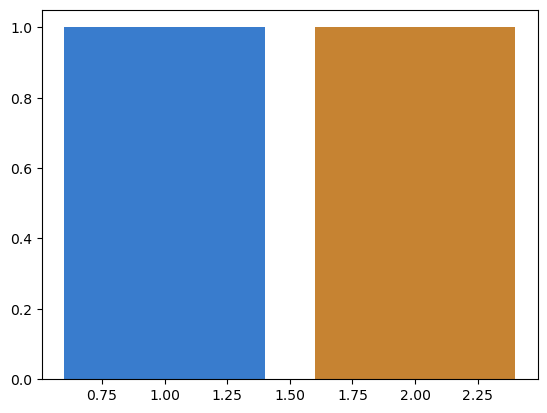

In [20]:
new_row = [np.round(255-top_colors.r[top_colors.index[0]]),np.round(255-top_colors.g[top_colors.index[0]]),np.round(255-top_colors.b[top_colors.index[0]])]
#if the flag has two colors only and one is white, we need to add a complementary color
number_colors = len(top_colors.r)

if number_colors == 1:
    top_colors.loc[top_colors.index[0]+1] = new_row
else:
    top_colors
#convert RGB to hex
def rgb_to_hex(red, green, blue):
    """Return color as #rrggbb for the given color values."""
    return '#%02x%02x%02x' % (red, green, blue)

top_colors['hex'] = top_colors.apply(lambda r: rgb_to_hex(*r), axis=1)
color = top_colors.hex.to_list()
plt.bar([1,2], [1,1], color = color)

print(color)

In [ ]:
# https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/InstructPix2Pix_using_diffusers.ipynb#scrollTo=1aRurg5CBe82

from PIL import Image
import svgwrite
import base64
from io import BytesIO

def png_to_base64(png_file_path):
    # Convert PNG to base64
    with open(png_file_path, "rb") as png_file:
        return f"data:image/png;base64,{base64.b64encode(png_file.read()).decode('utf-8')}"

def create_svg_with_layers(png_file1, png_file2, output_svg):
    # Create an SVG drawing
    dwg = svgwrite.Drawing(output_svg, profile='tiny', size=("500px", "500px"))
    
    # Convert PNG files to base64
    png_base64_1 = png_to_base64(png_file1)
    png_base64_2 = png_to_base64(png_file2)

    # Add the images as layers
    dwg.add(dwg.image(png_base64_1, insert=(0, 0), size=("500px", "500px")))
    dwg.add(dwg.image(png_base64_2, insert=(0, 0), size=("500px", "500px")))

    # Save the SVG file
    dwg.save()

# Example usage
create_svg_with_layers("temp\\preview.png", "temp\\product-nonbg.png", "output_image.svg")
